# Indeed-similarity

In [1]:
# Please follow https://github.com/CUB-indeed/documentations/blob/main/pypi-server/client.md to add PyPi server to your local pip config
# !pip install indeed-similarity

In [1]:
from indeed_similarity.similarity import SimilarityPipeline
from indeed_similarity.modules import (
    LevenshteinSimilarity,
    JaccardSimilarity,
    SequenceSimilarity,
    BertTransformerSimilarity,
    SpacyTransformerSimilarity
)

/Users/kritkorns/miniconda3/envs/ontomatch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import re
import preprocessor as p

SIMILARITY_FUNCTIONS = [
    LevenshteinSimilarity,
    JaccardSimilarity,
    SequenceSimilarity,
    BertTransformerSimilarity,
    SpacyTransformerSimilarity
]

# Pre-processing functions
preprocessing_fn = [
    lambda text: " ".join(str(text).split("_")),
    # lambda text: p.clean(str(text)),
    # lambda text: " ".join(re.findall("[A-Z][^A-Z]*", text)),
    # lambda text: re.sub(r"(?<=[a-z])\s+(?=[A-Z])", "", text),
]

# Post-processing functions (for visualzation of the string in the result only)
postprocessing_fn = [
    lambda text: "_".join(str(text).split(" ")),
]

similarity = SimilarityPipeline(
    SIMILARITY_FUNCTIONS, preprocessing_fn, postprocessing_fn,
)

a_list_1 = ["head", "tail", "arm", "human", "finger", "feet"]
a_list_2 = ["toe", "thumb", "hand", "headache", "armchair", "hair", "people", "finger nail", "toe_nail"]
similarity(a_list_1, a_list_2)

Processing SpacyTransformerSimilarity: 100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


{'LevenshteinSimilarity': <indeed_similarity.modules.levenshtein.LevenshteinSimilarity at 0x7f8fcf842ee0>,
 'JaccardSimilarity': <indeed_similarity.modules.jaccard.JaccardSimilarity at 0x7f8fcf842f10>,
 'SequenceSimilarity': <indeed_similarity.modules.sequence.SequenceSimilarity at 0x7f8fcf842e50>,
 'BertTransformerSimilarity': <indeed_similarity.modules.bert.BertTransformerSimilarity at 0x7f8fcf842fa0>,
 'SpacyTransformerSimilarity': <indeed_similarity.modules.spacy.SpacyTransformerSimilarity at 0x7f8fcfc902e0>,
 'average': <indeed_similarity.modules.base.SimilarityMatrix at 0x7f8fc6bb1e80>}

## Visualization Feature

In [7]:
# Similarity table
similarity["average"].df_sim

,toe,thumb,hand,headache,armchair,hair,people,finger_nail,toe_nail
head,0.302538,0.261479,0.577495,0.599456,0.276789,0.451968,0.188175,0.290207,0.308874
tail,0.318834,0.279300,0.266674,0.161319,0.259751,0.454152,0.163798,0.351725,0.500427
arm,0.169666,0.343456,0.380721,0.199752,0.435434,0.453734,0.055220,0.272785,0.237518
human,0.057020,0.387463,0.487835,0.242109,0.247548,0.337259,0.206769,0.139848,0.130551
finger,0.335284,0.283356,0.377764,0.181305,0.233403,0.396825,0.170514,0.737768,0.335590
feet,0.421011,0.284429,0.147202,0.221831,0.111934,0.132363,0.295480,0.287879,0.280696


In [9]:
# Similarity table stack
similarity["average"].df_sim_stack

,onto1,onto2,confidence
0,head,toe,0.302538
1,head,thumb,0.261479
2,head,hand,0.577495
3,head,headache,0.599456
4,head,armchair,0.276789
5,head,hair,0.451968
6,head,people,0.188175
7,head,finger_nail,0.290207
8,head,toe_nail,0.308874
9,tail,toe,0.318834


<Axes: >

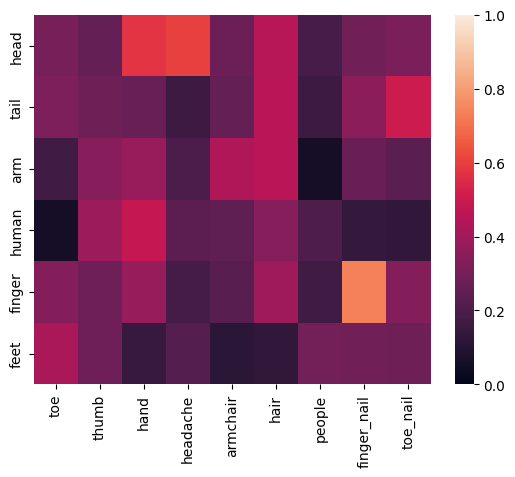

In [14]:
# Similarity matrix (matplotlib)
similarity["average"].plot()

<Axes: >

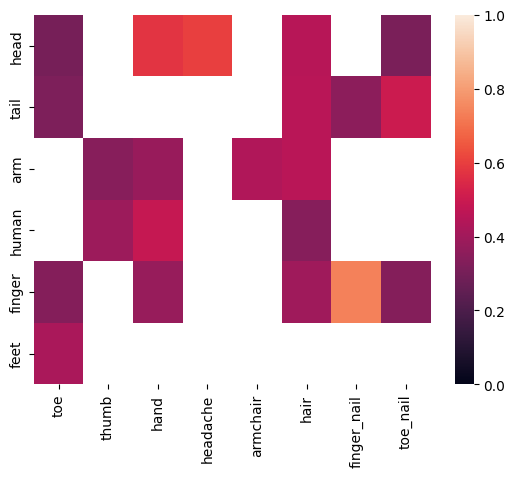

In [16]:
# Similarity matrix (matplotlib) with threshold
similarity["average"].plot(threshold=0.3)

In [17]:
# Similarity matrix (plotly)
similarity["average"].plot(plotly=True)

In [20]:
# Similarity matrix (plotly)
similarity["average"].plot(threshold=0.3, plotly=True)